# Modifying DataFrames: Creating columns and more

## Introduction
In this lab we'll cover the most common types of operations to "modify" dataframes. This includes:

- Creating new columns
- Deletion: deleting rows or columns
- Modifications: renaming columns, changing column types, modifying values
- Adding new rows

In the process, we'll also learn the important concepts of mutability/immutability and how to perform a "safe" Data Science workflow (spoiler: by avoiding modifications!)

> IMPORTANT NOTE: If you accidentally made incorrect modifications to the dataframe in this lab, you will need to redo all the previous steps in order to successfully complete the activity.

In [2]:
import pandas as pd

In [3]:
# Lists of data
data = {'Revenue': [274515,200734,182527,181945,143015,129184,92224,85965,84893,
                    82345,77867,73620,69864,63191],
        'Employees': [147000,267937,135301,878429,163000,197000,158000,58604,
                      109700,350864,110600,364800,85858,243540],
        'Sector': ['Consumer Electronics','Consumer Electronics','Software Services',
                   'Chip Manufacturing','Software Services','Consumer Electronics',
                   'Consumer Electronics','Software Services','Consumer Electronics',
                   'Consumer Electronics','Chip Manufacturing','Software Services',
                   'Software Services','Consumer Electronics'],
        'Founding Date':['01-04-1976','13-01-1969','04-09-1998','20-02-1974',
                         '04-04-1975','15-09-1987','01-02-1984','04-02-2004',
                         '07-04-1946','01-01-1910','18-07-1968','16-06-1911',
                         '11-11-1998','07-03-1918'],
        'Country':['USA','South Korea','USA','Taiwan','USA','China','USA','USA',
                   'Japan','Japan','USA','USA','China','Japan']} 
index = ['Apple','Samsung','Alphabet','Foxconn','Microsoft','Huawei',
         'Dell Technologies','Meta','Sony','Hitachi','Intel','IBM',
         'Tencent','Panasonic']

In [4]:
df = pd.DataFrame(data, index=index)

## Creating new columns
We'll start with one of the most straightforward operations: creating new columns. We can create new columns in multiple ways, but let's start with the most common one:

### Expressions (and vectorized operations)
The most common way to create a column is just as the result of an expression of other columns within the same DataFrame. If you're familiar with spreadsheets, this is a simple operation:

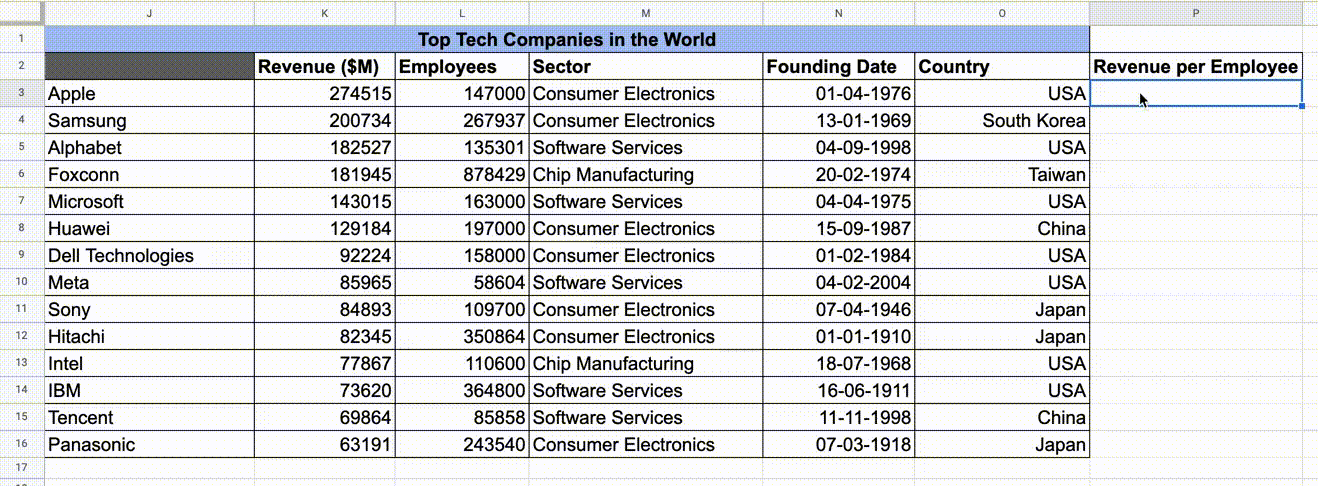
The syntax is extremely intuitive, it's just assigning "the new column" to a given expression:

<code>df["New Column Name"] = [EXPRESSION]</code>
In this case, the expression can be anything. Examples:

<code># A  simple arithmetic expression between two columns
df["New Column Name"] = df["Column 1"] + df["Column 2"]</code>

<code># A boolean expression
df["New Column Name"] = df["Column 1"] > 1000</code>

<code># A more advanced expression multiple columns
df["New Column Name"] = df["Column 1"] * (df["Column 2"] / df["Column 3"]) / df["Column 4"].std</code>
Let's use our sample DataFrame to calculate "Revenue per Employee" (as in the GIF above). The expression is just:

<code>df["Revenue per Employee"] = df["Revenue"] / df["Employees"]</code>

We call these expressions "vectorized operations", as they act upon the whole dataframe, regardless if it has 100 rows, or 1 billion. Vectorized Operations are extremely fast, even with large number of data.

In [5]:
df["Revenue per Employee"] = df["Revenue"] / df["Employees"]
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393


#### Activities

##### 1. Create a new column: Revenue in $

The column Revenue is expressed in millions of dollars. Create a new one, Revenue in $ with the values for revenue expressed in $US Dollars (single units).

In [6]:
df["Revenue in $"] = df["Revenue"] * 1_000_000
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000


##### 2. Create a new column: Is American?

Create a new boolean column Is American? that contains the value True for companies which Country is USA, and False otherwise.

In [7]:
df["Is American?"] = df['Country'] == 'USA'
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000,True
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000,False
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000,True
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000,True


## Creating Columns out of Fixed Values


### Single (hardcoded) value
We can create columns by also providing values directly. In its simplest form, we just assign the new column to a hardcoded value:

<code>df["New Column"] = VALUE</code>

This will set EVERY rows in the dataframe with that given value. In our notebook, we're setting the value Is Tech? to "Yes".


In [8]:
df['Is Tech?'] = "Yes"

In [9]:
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Is Tech?
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000,True,Yes
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000,False,Yes
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000,True,Yes
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False,Yes
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000,True,Yes


### Collection of values
Instead of providing just one value for the entire dataframe (and for every single row), we can provide a more "granular" collection containing the value for each row we want to assign.

Let's look at the example in the associated notebook. In the variable stock_prices we're storing the stock prices of the given companies. We'll then assign the values to the column "Stock Price" directly:

<code>stock_prices = [143.28, 49.87, 88.26, 1.83, 253.75, 0,
                43.4, 167.32, 89.1, 52.6, 25.58, 137.35, 48.23, 8.81]</code>

<code>df['Stock Price'] = stock_prices</code>

This works because the list stock_prices contains the same number of elements as in the DataFrame.

> Note: The stock prices here are estimate. Not all companies are listed in the same exchange, so we just estimated the value in dollars. Also, Huawei is not publicly listed, so we assigned a value of $0.

In [10]:
stock_prices = [143.28, 49.87, 88.26, 1.83, 253.75, 0,
                43.4, 167.32, 89.1, 52.6, 25.58, 137.35, 48.23, 8.81]

df['Stock Price'] = stock_prices
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Is Tech?,Stock Price
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000,True,Yes,143.28
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000,False,Yes,49.87
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000,True,Yes,88.26
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False,Yes,1.83
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000,True,Yes,253.75


#### Activities

##### 3. Create a new column with the CEOs of each company

Create new column CEO that contains the names of the CEOs of each company.

In [11]:
ceo_list = [
    "Tim Cook", "Kim Ki Nam", "Sundar Pichai",
    "Young Liu", "Satya Nadella", "Ren Zhengfei",
    "Michael Dell", "Mark Zuckerberg",
    "Kenichiro Yoshida", "Toshiaki Higashihara", "Patrick Gelsinger",
    "Arvind Krishna", "Ma Huateng", "Yuki Kusumi"]

df['CEO'] = ceo_list

## Deleting Columns with del

In [12]:
del df["Is Tech?"]
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Stock Price,CEO
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000,True,143.28,Tim Cook
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000,False,49.87,Kim Ki Nam
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000,True,88.26,Sundar Pichai
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False,1.83,Young Liu
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000,True,253.75,Satya Nadella


#### Activities

##### 4. Delete the column CEO

Using the del keyword, delete the column CEO.

In [13]:
del df['CEO']

## Mutability and Immutability
This is a VERY important concept in Data Science (and programming in general). When solving problems, we usually have the option to resolve them with a "mutable" solution, that is, modifying (or mutating) the underlying dataframe, or with an immutable solution, which performs the changes but without modifying the underlying data.

For example, most of the String methods in Python are immutable. You can perform a wide variety of operations (replace, title, upper, lower, etc) but the original string is NOT modified, these operations return NEW strings (new copies) with the desired changes applied. Take a look at the notebook for a few of these strings examples and pay attention at how the string s is not modified after any of the operations.

In [14]:
s = "Hello World"

In [15]:
s.replace("World", "Analyst")

'Hello Analyst'

In [16]:
# s is not modifierd
s

'Hello World'

In [17]:
s.lower()

'hello world'

In [18]:
# s is not modified
s

'Hello World'

### Favor Immutability
Python's decision for strings (and other, non mentioned modules) is not a coincidence. Most of the time (and only under rare exceptions), we should prefer immutable solutions. Specially in Pandas, operations that don't modify the underlying DataFrames or Series. That way, you can always safely try things without the risk of losing important data.

Here's an example of the flow you should expect when performing immutable operations (don't worry about the methods below, we'll learn about them in this and other projects):

<code>df = df.read_csv()</code>

<code>df_renamed = df.rename(...) # rename columns</code>

<code>df_notna = df_renamed.dropna(...)  # dropping null values</code>

<code>df_cleaned = df_notna.drop(...)  # dropping some values</code>

As you can see, the result of each operation is the "entry point" of the following operation, creating a chain. This is intentional, because, as you'll see, we'll use this "chaining" to our advantage. It's pretty common to see expressions that are a combination (chaining) of multiple methods one after the other:

<code>df.dropna().drop([...]).rename([...]).sort_values().head()</code>

### The inplace parameter
Before moving forward, we need to make a special mention about the inplace parameter.

The inplace parameter is EVERYWHERE in pandas methods, both for DataFrames and Series. For example, <code>df.dropna(inplace=True)</code>, <code>df.drop([...], inplace=True)</code>, <code>df.drop_duplicates(inplace=True)</code>, etc.

The inplace parameter changes the behavior of a given method from immutable (default) to mutable, modifying the underlying DataFrame. Again, by default, inplace is always <code>False</code>, as Pandas is always favoring immutability. You can alter that behavior by setting <code>inplace=True</code>, although, as we just mentioned, it's NOT recommended, except in some special cases.

Now, let's move to the next section to put these concepts to use!

## Deleting rows

The method to delete "arbitrary" rows is: <code>.drop</code>. It has some variations, as it can also be used to delete columns, but let's start with the basics.

The <code>.drop()</code> method accepts the indices of the values we want to remove, and as we previously mentioned, by default, is immutable.

<code>df.drop(["Microsoft", "Tencent", "Samsung", "Alphabet", "Meta", "Hitachi", "Apple"])</code>

In [19]:
df.drop(["Microsoft", "Tencent", "Samsung", "Alphabet", "Meta", "Hitachi", "Apple"])

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Stock Price
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False,1.83
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756,129184000000,False,0.00
Dell Technologies,92224,158000,Consumer Electronics,01-02-1984,USA,0.583696,92224000000,True,43.40
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865,84893000000,False,89.10
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042,77867000000,True,25.58
IBM,73620,364800,Software Services,16-06-1911,USA,0.201809,73620000000,True,137.35
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469,63191000000,False,8.81


In [20]:
# the underlying `df` has not changed
df.head()

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Stock Price
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000,True,143.28
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000,False,49.87
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000,True,88.26
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False,1.83
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000,True,253.75


Again, this method is IMMUTABLE. It doesn't modify the underlying dataframe: it immediately returns a new DataFrame with the modifications done. The common pattern is to assign the results of <code>.drop</code> to a variable: <code>df_new = df.drop(...)</code>. This allows us to re-play any operation if we find a mistake in the process.

#### Activities

##### 5. Drop Microsoft from the df

Using .drop, delete Microsoft and assign the result to df_no_windows. IMPORTANT, you should NOT modify df.

In [21]:
df_no_windows = df.drop(['Microsoft'])

### Mutable modification with inplace
We have iterated and reiterated the importance of favoring immutable solutions. But still, we need to cover how to perform mutable solutions. Just remember, use mutability as spare as possible.

As we've mentioned, most pandas operations accept the inplace parameter, which, when passed a True value, will perform such operation modifying the underlying DataFrame. We'll do it now with the .drop() parameter. Switch to the notebook to see how we're deleting the value for Huawei:

<code>df.drop("Huawei", inplace=True)</code>

As you can see, the method doesn't return anything (just None). It doesn't provide a result, as the result of the operation, is already applied to the underlying DataFrame. Check again the df to see that we have correctly deleted Huawei from the DataFrame.

#### Activities

##### 6. Delete inplace the values for IBM and Dell

Perform a mutable operation and delete the rows containing information for IBM and Dell Technologies.

In [22]:
df.drop(['IBM', 'Dell Technologies'], inplace=True)

## Deleting rows based on a condition
Deleting rows based on a condition is simple, as we'll just use the same .drop() method as before. What might be a little bit more "complicated" is the final syntax that will result from writing these conditions.

First all, remember that the .drop() method receives the index of the values we want to delete. Let's say we want to delete the companies with Revenue of LESS than M$80,000. Those companies are Intel, Tencent and Panasonic. So, we have to finally arrive to an expression that is equivalent to:

<code>df.drop(["Intel", "Tencent", "Panasonic"])</code>

How do we do that with conditions? It involves two steps:

First, let's write the condition:

<code>df.loc[df["Revenue"] < 80_000]</code>

But then, we need the index for the result of that condition. So we append the .index to the end of the condition. So, the final expression ends up being:

<code>df.drop(df.loc[df["Revenue"] < 80_000].index)</code>

That, as we said before, is not the most pleasing syntactical experience.

The condition:

In [23]:
df.loc[df["Revenue"] < 80_000]

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Stock Price
Intel,77867,110600,Chip Manufacturing,18-07-1968,USA,0.704042,77867000000,True,25.58
Tencent,69864,85858,Software Services,11-11-1998,China,0.813716,69864000000,False,48.23
Panasonic,63191,243540,Consumer Electronics,07-03-1918,Japan,0.259469,63191000000,False,8.81


Companies matching the condition:

In [24]:
df.loc[df["Revenue"] < 80_000].index

Index(['Intel', 'Tencent', 'Panasonic'], dtype='object')

The resulting drop expression:

In [25]:
# drop and sort_values chaining in action
df.drop(df.loc[df['Revenue'] < 80_000].index).sort_values(by='Revenue')

,Revenue,Employees,Sector,Founding Date,Country,Revenue per Employee,Revenue in $,Is American?,Stock Price
Hitachi,82345,350864,Consumer Electronics,01-01-1910,Japan,0.234692,82345000000,False,52.60
Sony,84893,109700,Consumer Electronics,07-04-1946,Japan,0.773865,84893000000,False,89.10
Meta,85965,58604,Software Services,04-02-2004,USA,1.466879,85965000000,True,167.32
Huawei,129184,197000,Consumer Electronics,15-09-1987,China,0.655756,129184000000,False,0.00
Microsoft,143015,163000,Software Services,04-04-1975,USA,0.877393,143015000000,True,253.75
Foxconn,181945,878429,Chip Manufacturing,20-02-1974,Taiwan,0.207125,181945000000,False,1.83
Alphabet,182527,135301,Software Services,04-09-1998,USA,1.349044,182527000000,True,88.26
Samsung,200734,267937,Consumer Electronics,13-01-1969,South Korea,0.749184,200734000000,False,49.87
Apple,274515,147000,Consumer Electronics,01-04-1976,USA,1.867449,274515000000,True,143.28


#### Activities

##### 7. Delete companies with revenue lower than the mean

Drop the companies that have a value of Revenue lower than the mean (average Revenue). Do NOT modify the original DataFrame; store the new results in df_high_revenue.

In [32]:
df_high_revenue = df.drop(df.loc[df['Revenue'] < df['Revenue'].mean()].index)

##### 8. Drop the companies that are NOT from the USA

Drop the companies whose country is NOT USA. Store the results in the variable df_usa_only.

In [36]:
df_usa_only = df.drop(df.loc[df['Country'] != 'USA'].index)

##### 9. Japanese companies sorted by Revenue (desc)

Using chaining methods, perform the following two operations in the same expression: * drop all the companies that are NOT Japanese * sort them by Revenue in descending order

Store your results in the variable df_jp_desc

In [39]:
df_jp_desc = df.drop(df.loc[df['Country'] != 'Japan'].index).sort_values(by='Revenue', ascending=False)

### Removing columns with .drop()
Finally, it's worth mentioning that the .drop() method can be used to delete columns as well, as an immutable alternative to del. The syntax is the same as removing rows, but to indicate that we want to delete columns, we must pass axis=1 as a parameter. By default, the axis parameter is 0, which means "delete at row level"; by setting it to 1 we're indicating we're deleting columns.

In [ ]:
df.drop(['Revenue', 'Employees'], axis=1)